<font color='blue' size=5><b>Комментарий тимлида</b></font>

<font color='blue'>Здравствуй, Марк! Это Демин Вячеслав. Мы делаем очень классный проект, давайте смотреть, что получилось.
<br> Если ты не против, давай перейдем на "ты". Согласен?
    
<font color='blue'>Я буду использовать различные цвета и знаки, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>Синий текст - просто текст комментария</font>

<font color='green'> ✔️Зеленый текст - все отлично</font>

<font color='darkorange'>⚠️Оранжевый текст - есть рекомендации, на что стоит обратить внимание</font>

<font color='crimson'> ❌Красный текст - есть недочеты</font>

---

<font color='blue'><b>Прошу не удалять и перемещать мои комментарии, каждый следующий проект должен включать предыдущий со всем комментариями.</b></font>

<font color='blue'>Твои комментарии можно помечать так:
    
<b>Комментарий студента: ...</b></font>
    

<font color='blue' size=5><b>Комментарий тимлида V2</b></font>
<font color='blue'><br>Новые комментарии буду вести с меткой V2.
<br> Спасибо, что учел замечания, я буду оставлять новые комментарии ниже старых. Старые выполненные буду зачеркивать <strike>так</strike>.</font>

# План работы:

# Описание проекта:

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

# Цель работы:
Уменьшить потребление электроэнергии на этапе обработки стали, разработать модель, осуществляющую предсказание значения последнего замера температуры. Качество по метрике MAE не выше 6.8
random_state = 50623

# Описание данных:

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

<font color='blue'><b>Комментарий тимлида</b></font><br>
<br><font color='green'> ✔️ Название и описание на месте.</font>

# План действий:

## - Предобработка данных:
### - Изучение общей информации о датасетах
### - Изменение типов данных
### - Отфильтровать данные, оставить только записи, где присутствует целевой признак
## - Анализ данных:
### - Объединение таблиц по ключам, которые есть во всех таблицах
### - Провести разделение на обучающую и тестовую выборку в соотношении 3:1
### - Поиск аномалий, удаление выбросов из обучающей выборки
### - Выделить целевй признак как последний замер в серии замеров температуры
## - Обучение и выбор модели:
### - Выберем подходящие регресионные модели, например, LGBMRegressor, CatBoost, XGBoost
### - Подбор гиперпараметров ` через OptunaSearchCV (внутри кросс-валидация, поэтому валидационной выборки не будет) `
### - Оценка важности признаков
### - Тест на адекватность с константной моделью
### - Выбор наилучшей модели по показателю метрики MAE, проверка модели на тестовой выборке 

<font color='blue'><b>Комментарий тимлида</b></font><br>
<br><font color='green'> ✔️ Хороший подробный план.</font>

---
<strike>
<br><font color='darkorange'>⚠️ Не понятно, как будут валидироваться модели</font>

In [1]:
!pip install optuna

     |████████████████████████████████| 390 kB 2.4 MB/s eta 0:00:01


In [2]:
# Загрузка необходимых библиотек:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import optuna

from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from optuna.integration import OptunaSearchCV
from sklearn.dummy import DummyRegressor

np.random.seed(50623)

In [3]:
# загрузка датасетов:
try:
    data_arc = pd.read_csv('/datasets/data_arc_new.csv')
    data_bulk = pd.read_csv('/datasets/data_bulk_new.csv')
    data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
    data_gas = pd.read_csv('/datasets/data_gas_new.csv')
    data_temp = pd.read_csv('/datasets/data_temp_new.csv')
    data_wire = pd.read_csv('/datasets/data_wire_new.csv')
    data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    data_arc = pd.read_csv('data_arc_new.csv')
    data_bulk = pd.read_csv('data_bulk_new.csv')
    data_bulk_time = pd.read_csv('data_bulk_time_new.csv')
    data_gas = pd.read_csv('data_gas_new.csv')
    data_temp = pd.read_csv('data_temp_new.csv')
    data_wire = pd.read_csv('data_wire_new.csv')
    data_wire_time = pd.read_csv('data_wire_time_new.csv')

k = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]

In [4]:
# Получение общей информации о данных:
for i in k:
    print(i.info())
    display(i.describe())
    display(i.head())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for i in k:
    i.columns = i.columns.str.lower()

In [6]:
data_arc.columns = ['key', 'akr_heating_start', 'ark_heating_end', 'active_power', 'reaсtive_power']
data_gas. columns = ['key', 'gas 1'] 
data_temp.columns = ['key', 'measurement_time', 'temp']

# Данные об электродах:

In [7]:
data_arc.describe()

,key,active_power,reaсtive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ Получаю ошибку кода

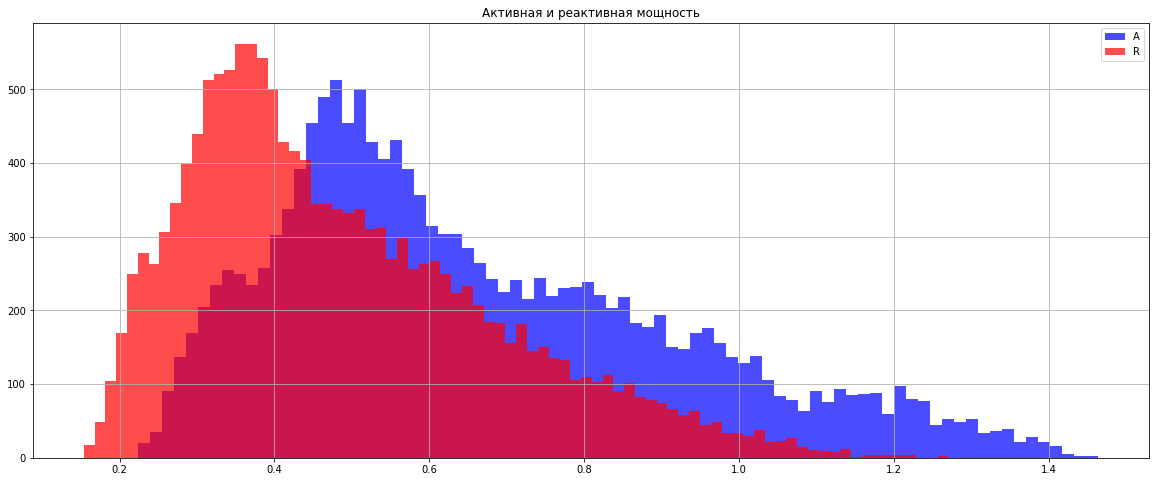

In [8]:
data_arc['active_power'].hist(bins=80, figsize=(20, 8), color='b', alpha=0.7)
data_arc[data_arc['reaсtive_power'] > 0]['reaсtive_power'].hist(bins=80, figsize=(20, 8), color='r', alpha=0.7)
plt.legend('AR')
plt.title('Активная и реактивная мощность')
plt.show()

Наблюдается нормальное распределение со смещением влево. Из гистограмм видно, что значения реактивной мощности в среднем чуть меньше, чем активной, распределения мощностей очень схожи.

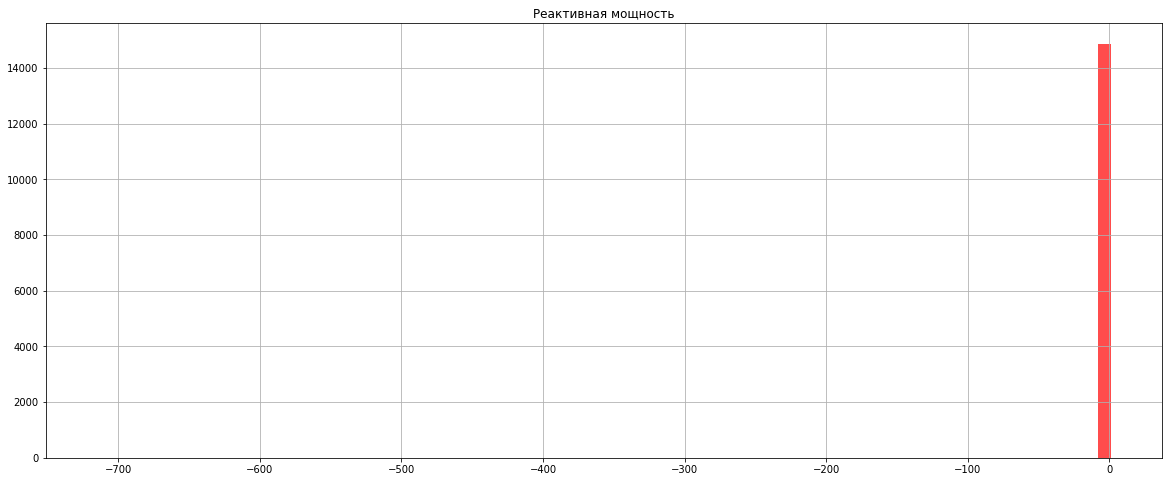

In [9]:
data_arc['reaсtive_power'].hist(bins=80, figsize=(20, 8), color='r', alpha=0.7)
plt.title('Реактивная мощность')
plt.show()

Как видно в значениях рекативной мощности пристутвует выброс в виде большого отрицательного значения.

In [10]:
len(data_arc['key'].unique())

3214

<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ Не хватает промежуточных выводов. План смотрю не только я, но и заказчик и его менеджеры. Поэтому каждый этап надо сопровождать выводами, а не только кодом

# Данные о подаче сыпучих материалов (объём)

In [11]:
data_bulk.describe()

,key,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,bulk 11,bulk 12,bulk 13,bulk 14,bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


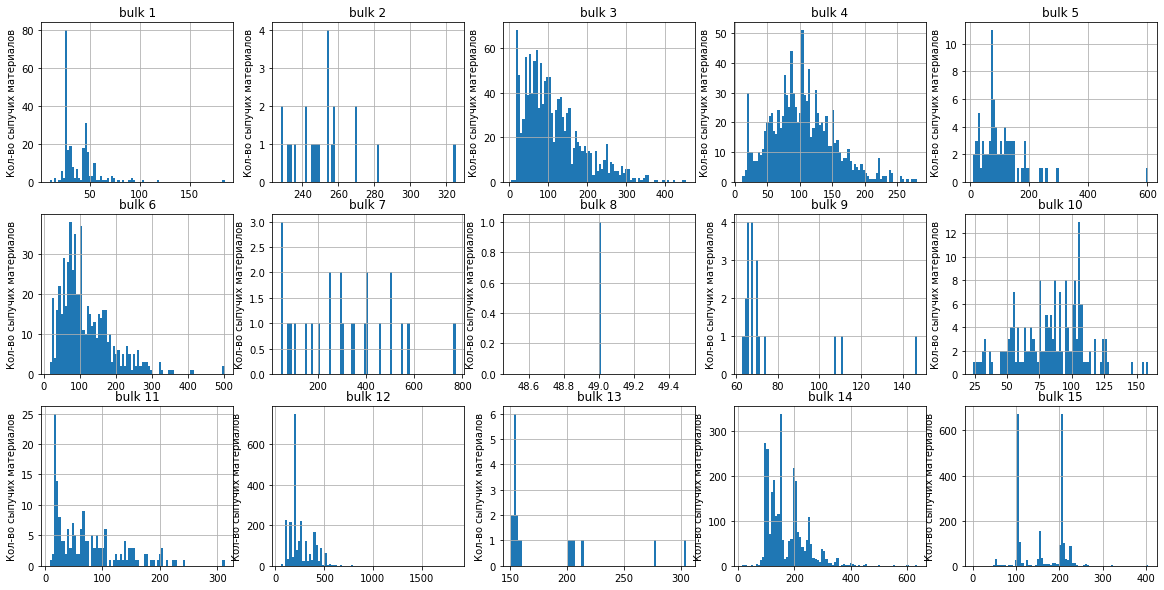

In [12]:
bulk_sum = []
col = []
i = 1
for column in data_bulk.columns:
    if column[0] == 'b':
        plt.subplot(3,5,i)
        i +=1
        data_bulk[column].hist(bins=80, figsize=(20, 10))
        plt.title(column)
        plt.ylabel('Кол-во сыпучих материалов')
        bulk_sum.append(data_bulk[column].sum())
        col.append(column)
plt.show()

<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ На этом графике нет названия и подписей. И он не читается для добавок, где было мало добавлено. Лучше применить разаделение на подграфики https://pythonguides.com/matplotlib-subplot-tutorial/

<font color='blue'><b>Комментарий тимлида V2</b></font><br>
<br><font color='green'> ✔️ Отличные графики по сыпучим материалам


Кол-во сыпучих материалов сильно разниться, одни материалы используют часто и для многих партий, другие нет.

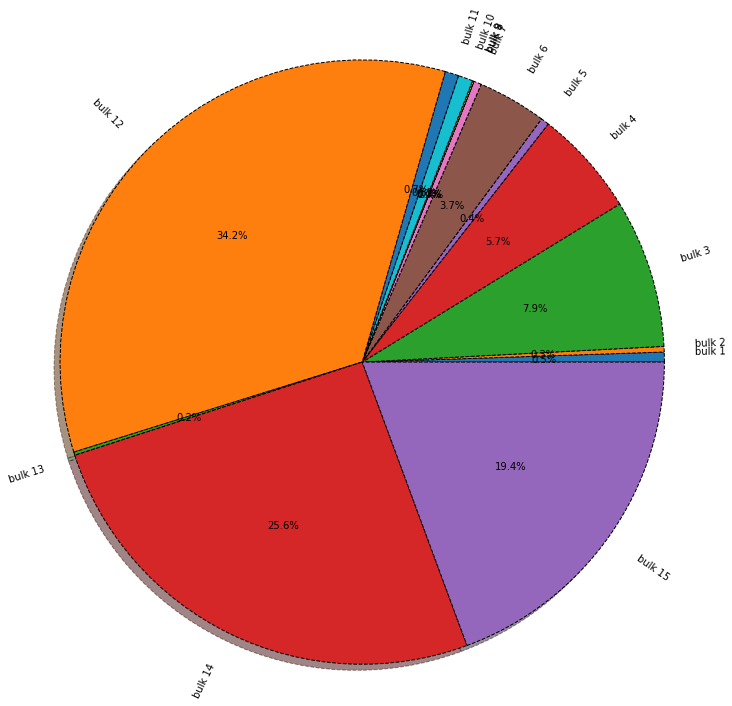

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(bulk_sum, labels=col, autopct='%1.1f%%', shadow=True,
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
plt.show()

Чаще всего используются сыпучие материалы с номером 12

In [14]:
len(data_bulk['key'].unique())

3129

# Данные о подаче сыпучих материалов (время)

In [15]:
data_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [16]:
for column in data_bulk_time.columns:
    if column[0] == 'b':
        print(data_bulk_time[column].describe())
        print()

count                     252
unique                    252
top       2019-06-04 16:19:59
freq                        1
Name: bulk 1, dtype: object

count                      22
unique                     22
top       2019-05-08 01:53:35
freq                        1
Name: bulk 2, dtype: object

count                    1298
unique                   1298
top       2019-07-26 03:50:40
freq                        1
Name: bulk 3, dtype: object

count                    1014
unique                   1014
top       2019-08-27 17:10:56
freq                        1
Name: bulk 4, dtype: object

count                      77
unique                     77
top       2019-06-16 00:51:58
freq                        1
Name: bulk 5, dtype: object

count                     576
unique                    576
top       2019-09-02 14:08:54
freq                        1
Name: bulk 6, dtype: object

count                      25
unique                     25
top       2019-08-13 11:01:00
freq            

In [17]:
len(data_bulk_time['key'].unique())

3129

#  Данные о продувке сплава газом

In [18]:
data_gas.describe()

,key,gas 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


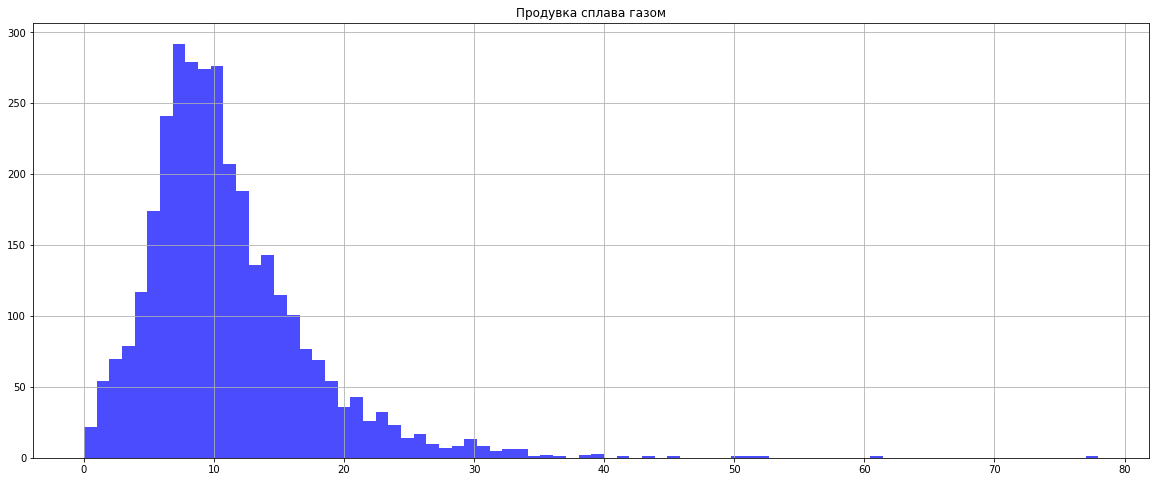

In [19]:
data_gas['gas 1'].hist(bins=80, figsize=(20, 8), color='b', alpha=0.7)
plt.title('Продувка сплава газом')
plt.show()

Наблюдается нормальное распределение со смещением влево

#  Результаты измерения температуры

In [20]:
data_temp.describe()

,key,temp
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


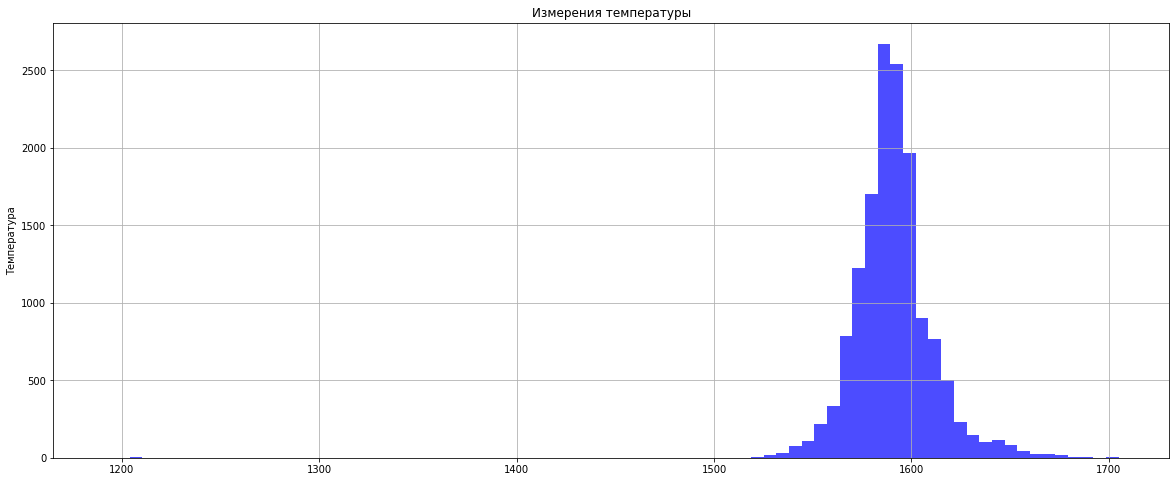

In [21]:
data_temp['temp'].hist(bins=80, figsize=(20, 8), color='b', alpha=0.7)
plt.title('Измерения температуры')
plt.ylabel('Температура')
plt.show()

Наблюдается нормальное распределение температуры.

In [22]:
len(data_temp['key'].unique())

3216

# Данные о проволочных материалах (объём)

In [23]:
data_wire.describe()

,key,wire 1,wire 2,wire 3,wire 4,wire 5,wire 6,wire 7,wire 8,wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


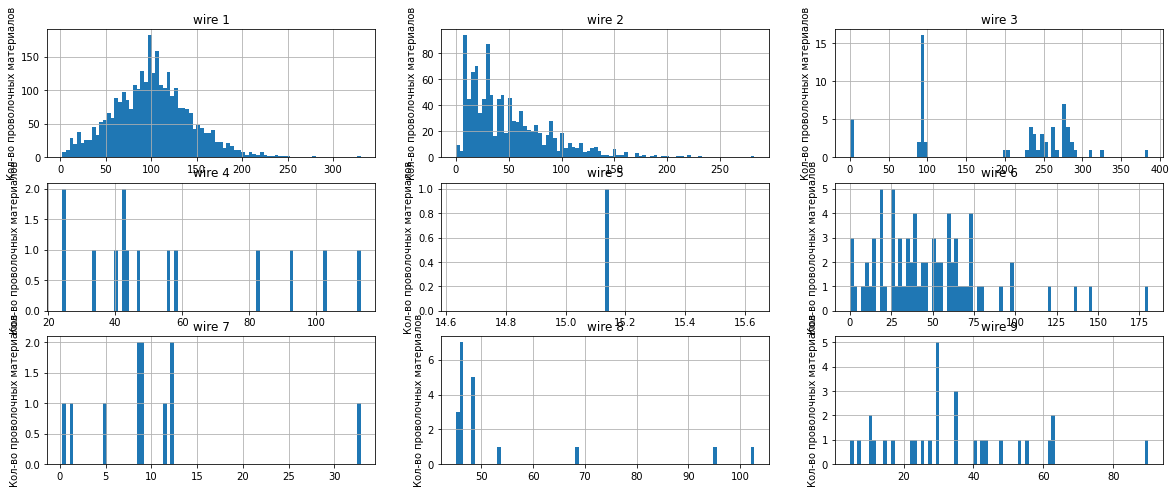

In [24]:
wire_sum = []
col = []
i = 1
for column in data_wire.columns:
    if column[0] == 'w':
        plt.subplot(3,3,i)
        i +=1
        data_wire[column].hist(bins=80, figsize=(20, 8))
        plt.title(column)
        plt.ylabel('Кол-во проволочных материалов')
        wire_sum.append(data_wire[column].sum())
        col.append(column)
plt.show()

Кол-во проволочных материалов сильно разниться, одни материалы используют часто и для многих партий, другие нет.

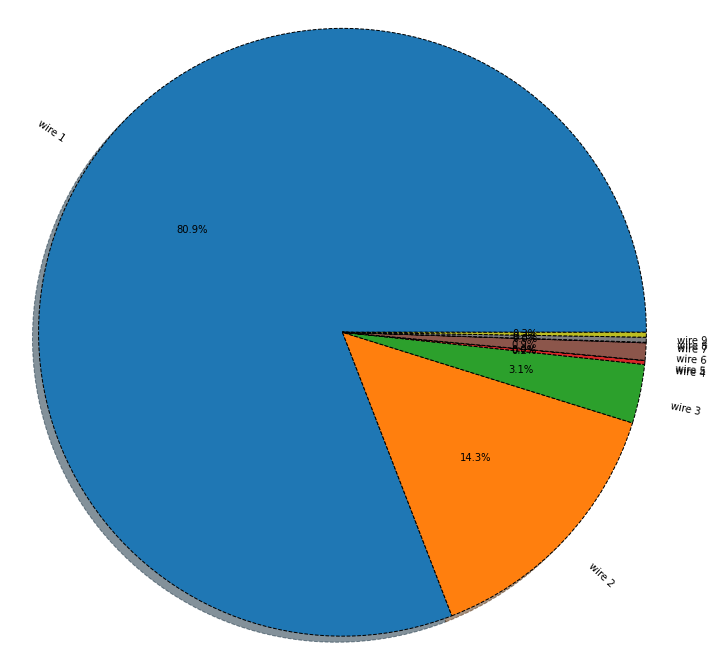

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(wire_sum, labels=col, autopct='%1.1f%%', shadow=True,
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
plt.show()

Проволочные материалы с ноиером 1 используются гораздо чаще остальных

In [26]:
len(data_wire['key'].unique())

3081

# Данные о проволочных материалах (время)

In [27]:
data_wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [28]:
for column in data_wire_time.columns:
    if column[0] == 'w':
        print(data_wire_time[column].describe())
        print()

count                    3055
unique                   3055
top       2019-05-09 07:34:06
freq                        1
Name: wire 1, dtype: object

count                    1079
unique                   1079
top       2019-07-08 01:12:22
freq                        1
Name: wire 2, dtype: object

count                      63
unique                     63
top       2019-08-17 10:16:32
freq                        1
Name: wire 3, dtype: object

count                      14
unique                     14
top       2019-07-27 03:25:58
freq                        1
Name: wire 4, dtype: object

count                       1
unique                      1
top       2019-08-13 06:14:30
freq                        1
Name: wire 5, dtype: object

count                      73
unique                     73
top       2019-08-13 22:23:13
freq                        1
Name: wire 6, dtype: object

count                      11
unique                     11
top       2019-07-27 07:56:34
freq            

In [29]:
len(data_wire_time['key'].unique())

3081

# Выводы:

- В таблицах разное кол-во уникальных номеров партий key, возможно эти данные утеряны
- Есть несколько столбцов, использующих тип данных float, но при этмо храняттолько целы значения
- Хранение времени в строке. Необходим перевод времени в формат datetime.
- Аномальное отрицательное значение реактивной мощности явно нуждается в удалении, так как это не соответсвует технологическому процессу

<div class="alert alert-warning">
  Вопросов к проекту не имею
</div>

<font color='blue'><b>Итоговый комментарий тимлида по плану:</b></font>
<br><font color='green'> ✔️ План есть.
<br> ✔️ Вопросов нет
</font>

---
<br><font color='blue'>Можно проект улучшить:</font><strike>
<br><font color='darkorange'>⚠️ Добавить валидацию моделей в план.</font></strike>

---
<br><font color='blue'>Что нужно исправить:</font><strike>
<br><font color='crimson'> ❌ Ошибка кода
<br><font color='crimson'> ❌ Нет промежуточных выводов.
<br><font color='crimson'> ❌ Добавить к графикам подписи и разделтиь перегруженные графики
</font>

<font color='blue'><b>Итоговый комментарий тимлида по плану V2:</b></font>
<br><font color='green'> ✔️ Все замечания учтены
</font>

---
<br><font color='blue'> Спасибо за твою работу, увидимся на этапе кода!

<font color='blue' size=5><b>Комментарий тимлида по коду</b></font>

<font color='blue'>Мы дошли до важной части проекта. Давай посмотрим, что получилось!</font>

<font color='blue' size=5><b>Комментарий тимлида по коду V2</b></font>

<font color='blue'>Новая итерация, новая модель</font>

<font color='blue' size=5><b>Комментарий тимлида по коду V3</b></font>

<font color='blue'>С каждым шагом мы приближаемся к лучшей модели</font>

<font color='blue' size=5><b>Комментарий тимлида по коду V4</b></font>

<font color='blue'>Посмотрим, что получилось</font>

# Предобработка данных:

In [30]:
# Найдем суммарные затраты активной и рекативной мощноти на каждую партию
data_arc = data_arc.query('reaсtive_power > 0')
data_arc_sum = pd.pivot_table(data_arc, values=['active_power', 'reaсtive_power'], index='key', aggfunc=sum)
data_arc_sum.head()

,active_power,reaсtive_power
key,,
1,3.036730,2.142821
2,2.139408,1.453357
3,4.063641,2.937457
4,2.706489,2.056992
5,2.252950,1.687991


Осуществим отбор ключей партий с интересующими нас замерами температуры, для каждого ключа должно осуществляться несколько замеров температуры(более одного), а также время последнего замера в data_temp должно быть позже последнего окончания нагрева дугой ark_heating_end в таблице data_arc.

In [31]:
# Рассмотрим данные, где присутствует лишь один замер температуры:
print((data_temp['key'].value_counts() == 1).sum())
data_temp['key'].value_counts() == 1

2


2108    False
1513    False
1689    False
2567    False
322     False
        ...  
556     False
1169    False
732     False
195      True
279      True
Name: key, Length: 3216, dtype: bool

In [32]:
# Таких записи две, удалим их:
data_temp = data_temp[data_temp['key'] != 175]
data_temp = data_temp[data_temp['key'] != 279]

In [33]:
data_temp = data_temp.dropna()
data_arc = data_arc.dropna()

data_temp_grouped = pd.pivot_table(data_temp, values='measurement_time', index='key', aggfunc=max)
data_arc_grouped = pd.pivot_table(data_arc, values='ark_heating_end', index='key', aggfunc=max)

compare_data = pd.concat([data_temp_grouped, data_arc_grouped], axis=1, sort=False)
compare_data = compare_data.fillna(0)
index_ban_list = []
for i in compare_data.index:
    try:
        if compare_data['measurement_time'].loc[i] < compare_data['ark_heating_end'].loc[i]:
            index_ban_list.append(i)
    except:
         index_ban_list.append(i)
print(index_ban_list, len(index_ban_list))

[175, 195, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664,

Получилось много ключей партий, в подавляющей большинстве случаев в них отсутствовало числовое значение показателя температуры на замере, все эти партии мы удалим, так как заменана любое рассчитанное число ухудшит модель

In [34]:
data_temp = data_temp.query('key not in @index_ban_list')
data_temp = data_temp.dropna()
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13918 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               13918 non-null  int64  
 1   measurement_time  13918 non-null  object 
 2   temp              13918 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 434.9+ KB


In [35]:
data_temp_pivot = pd.pivot_table(data_temp, values='measurement_time', index='key', aggfunc={min, max})
data_temp_pivot.columns = ['last_time', 'first_time']
data_temp_pivot['time'] = data_temp_pivot['last_time'].astype('datetime64') - data_temp_pivot['first_time'].astype('datetime64')
data_temp_pivot['time'] = data_temp_pivot['time'].dt.seconds
data_temp_pivot.head()

,last_time,first_time,time
key,,,
1,2019-05-03 11:30:38,2019-05-03 11:02:04,1714
2,2019-05-03 11:55:09,2019-05-03 11:34:04,1265
3,2019-05-03 12:35:57,2019-05-03 12:06:44,1753
4,2019-05-03 12:59:47,2019-05-03 12:39:27,1220
5,2019-05-03 13:36:39,2019-05-03 13:11:03,1536


In [36]:
firts_temp = []
last_temp = []

for key in data_temp_pivot.index:
    for i, t in zip(data_temp[data_temp['key'] == key]['measurement_time'], data_temp[data_temp['key'] == key]['temp']):
        if i == data_temp_pivot.loc[key]['last_time']:
            last_temp.append(t)
        if i == data_temp_pivot.loc[key]['first_time']:
            firts_temp.append(t)
data_temp_pivot['last_temp'] = last_temp
data_temp_pivot['first_temp'] = firts_temp
data_temp_pivot.head()

,last_time,first_time,time,last_temp,first_temp
key,,,,,
1,2019-05-03 11:30:38,2019-05-03 11:02:04,1714,1613.0,1571.0
2,2019-05-03 11:55:09,2019-05-03 11:34:04,1265,1602.0,1581.0
3,2019-05-03 12:35:57,2019-05-03 12:06:44,1753,1599.0,1596.0
4,2019-05-03 12:59:47,2019-05-03 12:39:27,1220,1625.0,1601.0
5,2019-05-03 13:36:39,2019-05-03 13:11:03,1536,1602.0,1576.0


Для объединения таблиц преобразуем индексы в значения key и осужествим объединение по ним

In [37]:
# КОД ТИМЛИДА
#data[data.key == 63]

In [38]:
data_temp_pivot.loc[63]

last_time     2019-05-05 22:36:23
first_time    2019-05-05 22:04:48
time                         1895
last_temp                  1580.0
first_temp                 1580.0
Name: 63, dtype: object

<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ Удалены хорошие показатели температуры, когда время измерения разные, но температуры одинаковы

In [39]:
data_bulk = data_bulk.set_index('key')
data_gas = data_gas.set_index('key')
data_wire = data_wire.set_index('key')

In [40]:
data_general = pd.concat([data_bulk, data_gas, data_wire, data_arc_sum, data_temp_pivot], join='inner', axis=1, sort=False)
# Удалим из итоговой таблицы записи, в которых отсутсвтует целевой признак:
data_general = data_general.dropna(subset=['last_temp'])
# Удалим из итоговой таблицы записи созначением time 0, в таких случаях проводился лишь один замер или отсутствует финальный замер
data_general = data_general[data_general['time'] != 0 ]


<font color='blue'><b>Комментарий тимлида v2</b></font><br><strike>
<font color='crimson'> ❌ Объединение таблиц должны проходить по правилу inner. Заказчика интересуют только партии, которые присутвуют во всех датасетах. Если заполнять 0 пустоты до объединения, то после их не должно быть.

In [41]:
data_general = data_general.drop(['first_time', 'last_time'], axis=1)

In [42]:
data_general.info()
data_general.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 1 to 2499
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bulk 1          199 non-null    float64
 1   bulk 2          13 non-null     float64
 2   bulk 3          959 non-null    float64
 3   bulk 4          812 non-null    float64
 4   bulk 5          53 non-null     float64
 5   bulk 6          437 non-null    float64
 6   bulk 7          13 non-null     float64
 7   bulk 8          1 non-null      float64
 8   bulk 9          13 non-null     float64
 9   bulk 10         143 non-null    float64
 10  bulk 11         130 non-null    float64
 11  bulk 12         1811 non-null   float64
 12  bulk 13         14 non-null     float64
 13  bulk 14         2067 non-null   float64
 14  bulk 15         1699 non-null   float64
 15  gas 1           2328 non-null   float64
 16  wire 1          2305 non-null   float64
 17  wire 2          811 non-null    f

,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 8,bulk 9,bulk 10,...,wire 5,wire 6,wire 7,wire 8,wire 9,active_power,reaсtive_power,time,last_temp,first_temp
key,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.036730,2.142821,1714,1613.0,1571.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.139408,1.453357,1265,1602.0,1581.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.063641,2.937457,1753,1599.0,1596.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.706489,2.056992,1220,1625.0,1601.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.252950,1.687991,1536,1602.0,1576.0


In [43]:
# Удалим пустой столбец wire 5, так как она пустой
data_general = data_general.drop(['wire 5', 'bulk 8', 'wire 7'] ,axis=1)

In [44]:
# Заполним все пропуски(NaN) нулями:
data_general = data_general.fillna(0)
data_general.isna().sum().sum()

0

In [45]:
# Признаки созданные ниже не улучшили качество модели
wire_other = 0
bulk_other = 0
bulk_columns = []
wire_columns = []


drop_columns = []
for column in data_general.columns:
    if column[0] == 'b':       
        bulk_other += data_general[column]
        drop_columns.append(column)
        bulk_columns.append(column)
    if column[0] == 'w': 
        wire_other += data_general[column]
        drop_columns.append(column)
        wire_columns.append(column)
data_general['wire_other'] = wire_other
data_general['bulk_other'] = bulk_other


In [46]:
count_bulk = []
count_wire = []
for i in range(len(data_general)):
    count_bulk.append((data_general.iloc[i][bulk_columns] != 0).sum())
    count_wire.append((data_general.iloc[i][wire_columns] != 0).sum())
data_general['count_bulk'] = count_bulk
data_general['count_wire'] = count_wire

In [47]:
#data_general = data_general.drop(drop_columns, axis=1)

In [48]:
# Проведем тест на целочисленность столбцов:
(data_general%1 > 0).sum()

bulk 1               0
bulk 2               0
bulk 3               0
bulk 4               0
bulk 5               0
bulk 6               0
bulk 7               0
bulk 9               0
bulk 10              0
bulk 11              0
bulk 12              0
bulk 13              0
bulk 14              0
bulk 15              0
gas 1             2328
wire 1            2305
wire 2             811
wire 3              39
wire 4              12
wire 6              45
wire 8              13
wire 9              24
active_power      2328
reaсtive_power    2328
time                 0
last_temp            0
first_temp           0
wire_other        2328
bulk_other           0
count_bulk           0
count_wire           0
dtype: int64

Как можно заметить все столбцы bulk а также first_temp и last_temp по факту являются целочисленными, поэтому изменим для них тип данных

In [49]:
# Вместо активной и реактивной мощности расчитаем одну полную мощность
data_general['power'] = np.sqrt(data_general['active_power']**2 + data_general['reaсtive_power']**2)
data_general = data_general.drop(['reaсtive_power', 'active_power'], axis=1)

In [50]:
# Изменение типов данных:
data_general['first_temp'] = data_general['first_temp'].astype('int')
data_general['last_temp'] = data_general['last_temp'].astype('int')
data_general['time'] = data_general['time'].astype('int')
# Признаки созданные ниже не улучшили качество модели
#data_general['count_bulk'] = data_general['count_bulk'].astype('int')
#data_general['count_wire'] = data_general['count_wire'].astype('int')
for column in data_general.columns:
    if column[0] == 'b':
        data_general[column] = data_general[column].astype('int')
data_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 1 to 2499
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bulk 1      2328 non-null   int64  
 1   bulk 2      2328 non-null   int64  
 2   bulk 3      2328 non-null   int64  
 3   bulk 4      2328 non-null   int64  
 4   bulk 5      2328 non-null   int64  
 5   bulk 6      2328 non-null   int64  
 6   bulk 7      2328 non-null   int64  
 7   bulk 9      2328 non-null   int64  
 8   bulk 10     2328 non-null   int64  
 9   bulk 11     2328 non-null   int64  
 10  bulk 12     2328 non-null   int64  
 11  bulk 13     2328 non-null   int64  
 12  bulk 14     2328 non-null   int64  
 13  bulk 15     2328 non-null   int64  
 14  gas 1       2328 non-null   float64
 15  wire 1      2328 non-null   float64
 16  wire 2      2328 non-null   float64
 17  wire 3      2328 non-null   float64
 18  wire 4      2328 non-null   float64
 19  wire 6      2328 non-null  

In [51]:
data_general['power/time'] = data_general['power'] / data_general['time']

В получившемся датасете рассмотрим как распределены данные:

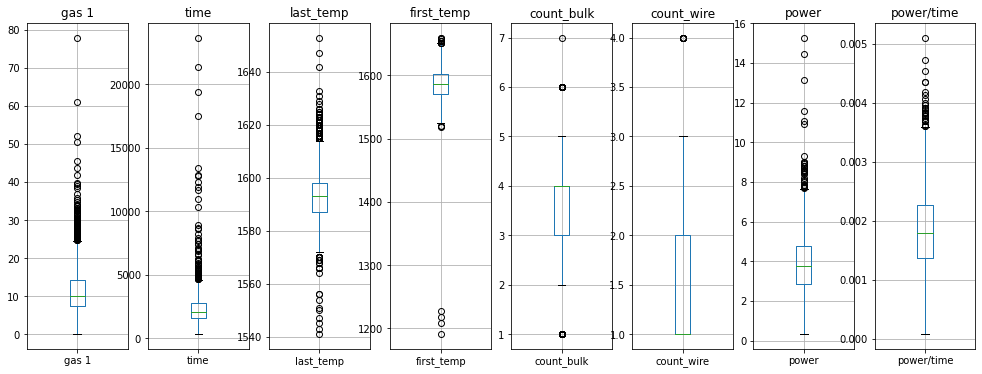

In [52]:
fig, ax = plt.subplots(figsize=[17, 6])
i = 1
for column in data_general.columns:
    if column[0] != 'b' and column[0] != 'w':
        plt.subplot(1, 8, i)
        i +=1
        data_general.boxplot(column = column)
        plt.title(column)
plt.show()

<font color='blue'><b>Комментарий тимлида v2</b></font><br><strike>
<font color='crimson'> ❌ Температуры ниже 1300 являются аномалиями, их нужно удалить из выборки

Как видно из построенных ящиков с усами значения температуры ниже 1300 являются аномальными, удалми их

In [53]:
data_general = data_general[data_general['first_temp'] > 1300]

In [54]:
data_general.corr()

,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 9,bulk 10,bulk 11,...,wire 9,time,last_temp,first_temp,wire_other,bulk_other,count_bulk,count_wire,power,power/time
bulk 1,1.000000,0.224677,-0.011202,0.041662,0.060365,-0.003339,0.237195,-0.019800,-0.023333,-0.038008,...,0.011013,0.144438,-0.075188,0.079098,0.043942,0.323822,0.270924,0.021987,0.098109,-0.084374
bulk 2,0.224677,1.000000,-0.046908,0.040756,0.360291,-0.030018,0.679352,-0.005344,-0.018055,0.001449,...,-0.006857,0.267479,-0.082456,0.141547,0.089364,0.040136,0.048798,0.246250,0.090137,-0.106088
bulk 3,-0.011202,-0.046908,1.000000,-0.295035,-0.006624,0.061881,-0.033474,0.011492,-0.085050,-0.007153,...,0.004789,0.023502,-0.037219,-0.113053,0.077904,0.208280,0.157857,0.059364,0.101362,0.027614
bulk 4,0.041662,0.040756,-0.295035,1.000000,0.028273,-0.251712,0.045866,-0.002995,-0.084975,-0.119733,...,-0.058236,0.002045,0.188236,0.165484,0.043353,0.135804,0.108246,-0.227397,0.004856,-0.007896
bulk 5,0.060365,0.360291,-0.006624,0.028273,1.000000,-0.021807,0.288327,-0.008449,-0.028544,-0.015888,...,-0.010840,0.103660,-0.028345,0.078729,0.061128,0.052778,0.087348,0.067526,0.073104,-0.031702
bulk 6,-0.003339,-0.030018,0.061881,-0.251712,-0.021807,1.000000,-0.025125,-0.028795,-0.097274,0.197716,...,-0.013286,0.155634,-0.183314,-0.127085,-0.080243,0.118548,0.116638,0.097785,0.133945,-0.048703
bulk 7,0.237195,0.679352,-0.033474,0.045866,0.288327,-0.025125,1.000000,-0.004685,-0.015828,-0.004937,...,-0.006011,0.238066,-0.107281,0.087774,0.087496,0.120510,0.059006,0.215432,0.145240,-0.051686
bulk 9,-0.019800,-0.005344,0.011492,-0.002995,-0.008449,-0.028795,-0.004685,1.000000,-0.017319,-0.013518,...,-0.006577,-0.006884,-0.016069,-0.033394,0.112796,-0.034657,0.003514,0.190104,0.025547,0.032647
bulk 10,-0.023333,-0.018055,-0.085050,-0.084975,-0.028544,-0.097274,-0.015828,-0.017319,1.000000,-0.045666,...,-0.022220,-0.009042,0.061391,0.035789,-0.030151,0.020896,0.103116,-0.106847,0.009686,0.017255
bulk 11,-0.038008,0.001449,-0.007153,-0.119733,-0.015888,0.197716,-0.004937,-0.013518,-0.045666,1.000000,...,-0.017343,0.038525,-0.114749,-0.110430,-0.058930,0.068594,0.132055,0.028572,0.065334,0.017665


In [55]:
#pd.plotting.scatter_matrix(data_general, figsize =(40,40))
#plt.show()

Как можно заметить попытки наглядно отобразить звисимость признаков между собой ни к чему не приводят, таблица корреляции слишком громоздкая, а scatter_matrix не читаемая, более наглядно взаимосвязь в датасете с таким большим кол-вом столбцов может отобразить хитмап.

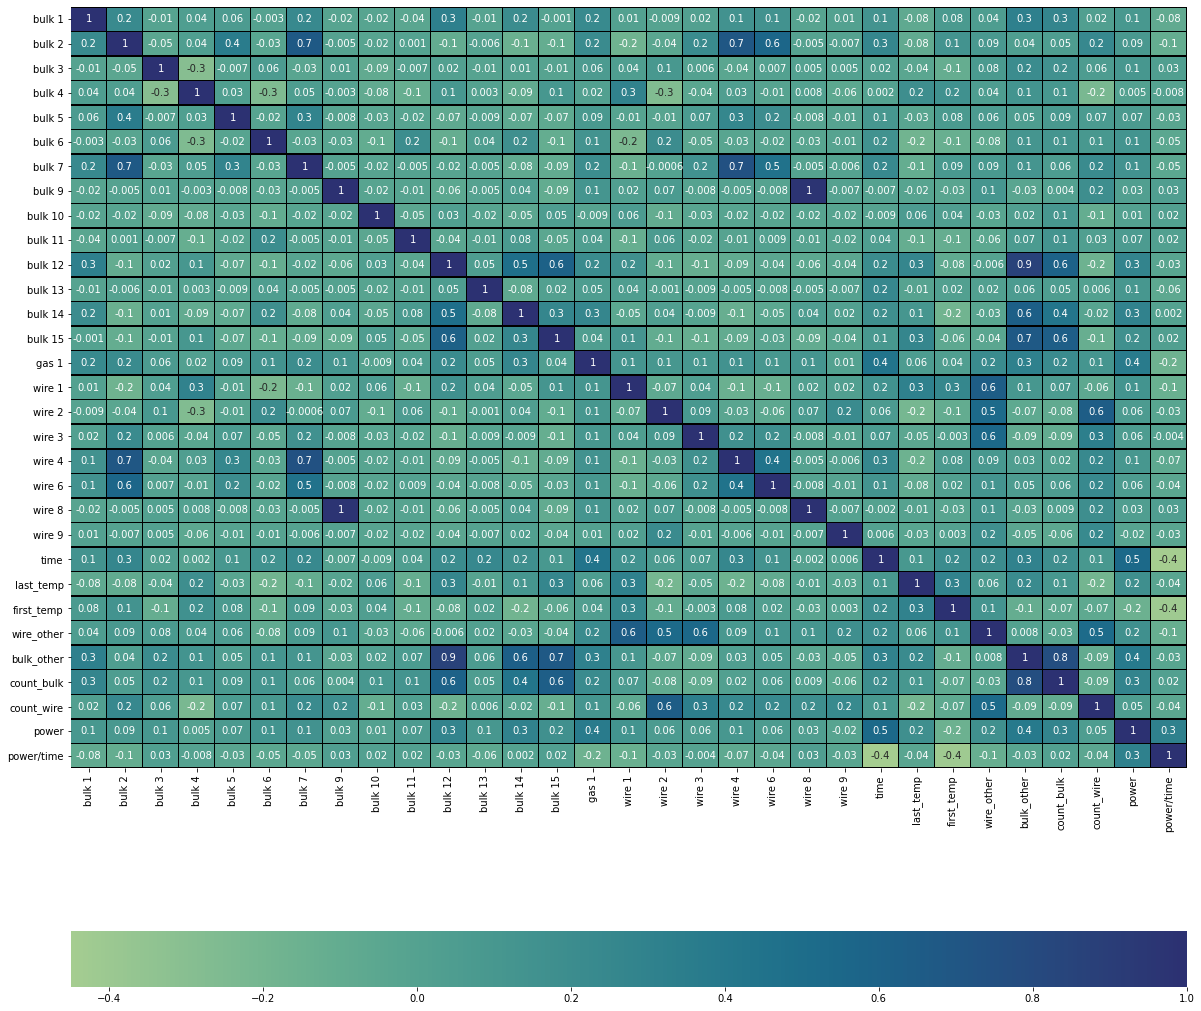

In [56]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_general.corr(),
            annot = True,
            fmt='.1g',
            linewidth=.5,
            linecolor='black',
            cbar_kws= {'orientation': 'horizontal'},
            cmap='crest')
plt.show()                                          

wire 8 и bulk 9 мультиколлинераны, удалим один из столбцов

In [57]:
data_general = data_general.drop(['wire 8'], axis=1)

In [58]:
data_general.head()

,bulk 1,bulk 2,bulk 3,bulk 4,bulk 5,bulk 6,bulk 7,bulk 9,bulk 10,bulk 11,...,wire 9,time,last_temp,first_temp,wire_other,bulk_other,count_bulk,count_wire,power,power/time
key,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,43,0,0,0,0,0,0,...,0.0,1714,1613,1571,60.059998,553,4,1,3.716640,0.002168
2,0,0,0,73,0,0,0,0,0,0,...,0.0,1265,1602,1581,96.052315,582,4,1,2.586371,0.002045
3,0,0,0,34,0,0,0,0,0,0,...,0.0,1753,1599,1596,91.160157,544,4,1,5.014163,0.002860
4,0,0,0,81,0,0,0,0,0,0,...,0.0,1220,1625,1601,89.063515,595,4,1,3.399456,0.002786
5,0,0,0,78,0,0,0,0,0,0,...,0.0,1536,1602,1576,98.352796,584,4,2,2.815155,0.001833


In [59]:
# Для оценки важности признаков добваим столбец со случайными значениями, столбцы чья корреляция ниже случайного столбца лишь мешают
np.random.seed(50623)
data_general['random'] = np.random.rand(data_general.shape[0])
print(data_general.corr()['last_temp'])
data_general.corr()['last_temp'].abs() < data_general.corr()['last_temp']['random']

bulk 1       -0.075188
bulk 2       -0.082456
bulk 3       -0.037219
bulk 4        0.188236
bulk 5       -0.028345
bulk 6       -0.183314
bulk 7       -0.107281
bulk 9       -0.016069
bulk 10       0.061391
bulk 11      -0.114749
bulk 12       0.267532
bulk 13      -0.010912
bulk 14       0.114432
bulk 15       0.266764
gas 1         0.059285
wire 1        0.317764
wire 2       -0.206764
wire 3       -0.047529
wire 4       -0.159731
wire 6       -0.084032
wire 9       -0.027480
time          0.096409
last_temp     1.000000
first_temp    0.302043
wire_other    0.061486
bulk_other    0.222496
count_bulk    0.109502
count_wire   -0.191041
power         0.175411
power/time   -0.036109
random        0.014177
Name: last_temp, dtype: float64


bulk 1        False
bulk 2        False
bulk 3        False
bulk 4        False
bulk 5        False
bulk 6        False
bulk 7        False
bulk 9        False
bulk 10       False
bulk 11       False
bulk 12       False
bulk 13        True
bulk 14       False
bulk 15       False
gas 1         False
wire 1        False
wire 2        False
wire 3        False
wire 4        False
wire 6        False
wire 9        False
time          False
last_temp     False
first_temp    False
wire_other    False
bulk_other    False
count_bulk    False
count_wire    False
power         False
power/time    False
random        False
Name: last_temp, dtype: bool

In [60]:
data_general = data_general.drop(['random'], axis=1)

Поиск аномалий можно осуществить методом k-ближайщих соседей.

In [61]:
#anomaly_model = KNN()
#anomaly_model.fit(data_general) 
#data_general['is_anomaly'] = anomaly_model.predict(data_general) == 1
#data_general['is_anomaly'].value_counts()

<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ Аномалии, если они есть можно удалять только из обучающей выборки. Заказчик хочет, чтобы модель могла работать на реальных данных, поэтому тестовую выборку нужно использовтаь как есть.

In [62]:
#data_general = data_general[data_general['is_anomaly'] != 1]
#data_general = data_general.drop(['is_anomaly'], axis=1)

Разобьем данные на train и test к соотношению 3/1.

In [63]:
np.random.seed(50623)
features = data_general.drop('last_temp', axis=1)
target = data_general['last_temp']
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25)

# Регуляризация LASSO (L1)

In [141]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=50623).fit(features, target)
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(features)
selected_columns = data_general.columns[data_general.var() != 0]
print(selected_columns)

Index(['bulk 1', 'bulk 2', 'bulk 3', 'bulk 4', 'bulk 5', 'bulk 6', 'bulk 7',
       'bulk 9', 'bulk 10', 'bulk 11', 'bulk 12', 'bulk 13', 'bulk 14',
       'bulk 15', 'gas 1', 'wire 1', 'wire 2', 'wire 3', 'wire 4', 'wire 6',
       'wire 9', 'time', 'last_temp', 'first_temp', 'wire_other', 'bulk_other',
       'count_bulk', 'count_wire', 'power', 'power/time'],
      dtype='object')


C:\Users\User\anacondafolder\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Random Forest Importance

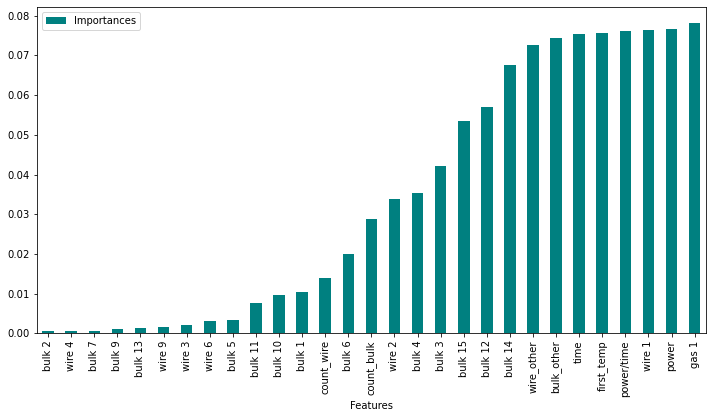

In [142]:
model = RandomForestClassifier(n_estimators=200)
model.fit(features, target)
importances = model.feature_importances_
final_df = pd.DataFrame({"Features" : pd.DataFrame(features).columns, "Importances" : importances})
final_df.set_index('Importances')
final_df = final_df.sort_values('Importances')
final_df.plot.bar(x='Features', y='Importances', color = 'teal', figsize=(12,6))
plt.show()

In [143]:
#data_general_new = data_general[final_df[final_df['Importances'] > 0.005]['Features']]
#data_general_new['last_temp'] = data_general['last_temp']

In [144]:
# Перезапишем фичи и таргеты с учетом изменений в датасете:
np.random.seed(50623)
features = data_general.drop('last_temp', axis=1)
target = data_general['last_temp']
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25)

# Поиск аномалий в обучающей выборке:
#data_train = pd.DataFrame(features_train)
#data_train['last_temp'] = target_train

#anomaly_model = KNN()
#anomaly_model.fit(data_train) 
#data_train['is_anomaly'] = anomaly_model.predict(features_train) == 1
#data_train['is_anomaly'].value_counts()


                                                                                                             

In [145]:
#data_train = data_train[data_train['is_anomaly'] != 1]
#data_train = data_train.drop(['is_anomaly'], axis=1)
#features_train = data_train.drop(['last_temp'], axis=1)
#target_train = data_train['last_temp']

# Обучение модели:

# LinearRegression

In [146]:
%%time
np.random.seed(50623)
regressor = LinearRegression()
hyperparams = {
}
clf = OptunaSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=5)
clf.fit(features_train, target_train)
cv_mae_linear_regression = clf.best_params_
print(clf.best_params_)
cv_mae_linear_regression = (clf.best_score_)
cv_mae_linear_regression

<timed exec>:5: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-06-20 01:21:28,843] A new study created in memory with name: no-name-8acad54b-1e35-4d78-a889-735ec0b7c1a3
[I 2023-06-20 01:21:28,874] Trial 0 finished with value: -7.026740915428304 and parameters: {}. Best is trial 0 with value: -7.026740915428304.
[I 2023-06-20 01:21:28,890] Trial 1 finished with value: -7.026740915428304 and parameters: {}. Best is trial 0 with value: -7.026740915428304.
[I 2023-06-20 01:21:28,921] Trial 2 finished with value: -7.026740915428304 and parameters: {}. Best is trial 0 with value: -7.026740915428304.
[I 2023-06-20 01:21:28,937] Trial 3 finished with value: -7.026740915428304 and parameters: {}. Best is trial 0 with value: -7.026740915428304.
[I 2023-06-20 01:21:28,953] Trial 4 finished with value: -7.026740915428304 and parameters: {}. Best is trial 0 with value: -7.026740915428304.
[I 2023-06-20 01:21:28,984] Tria

{}
Wall time: 235 ms


-7.026740915428304

<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ Только одна модель, лучшая на кросс-валидации тестируется

# SVR

In [147]:
%%time
np.random.seed(50623)
regressor = SVR(gamma="auto")
hyperparams = {
    "C": optuna.distributions.FloatDistribution(1e-10, 1e10, log=True)
}
clf = OptunaSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=5)
clf.fit(features_train, target_train)
best_params_svr = clf.best_params_
print(clf.best_params_)
cv_mae_svr = (clf.best_score_)
cv_mae_svr

<timed exec>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-06-20 01:21:29,094] A new study created in memory with name: no-name-01e05026-a4a2-463a-811b-365a68fb2930
[I 2023-06-20 01:21:30,302] Trial 0 finished with value: -8.094875249630398 and parameters: {'C': 0.0007370097807257753}. Best is trial 0 with value: -8.094875249630398.
[I 2023-06-20 01:21:31,699] Trial 1 finished with value: -8.092333386200925 and parameters: {'C': 349072102.17360526}. Best is trial 1 with value: -8.092333386200925.
[I 2023-06-20 01:21:32,884] Trial 2 finished with value: -8.09488893974196 and parameters: {'C': 4.5144166349701964e-05}. Best is trial 1 with value: -8.092333386200925.
[I 2023-06-20 01:21:34,251] Trial 3 finished with value: -8.092333386200925 and parameters: {'C': 379.60305692510684}. Best is trial 1 with value: -8.092333386200925.
[I 2023-06-20 01:21:35,632] Trial 4 finished with value: -8.092333386200925 an

{'C': 349072102.17360526}
Wall time: 13.4 s


-8.092333386200925

# CatBoostRegressor

In [66]:
%%time
np.random.seed(50623)
regressor = CatBoostRegressor(verbose=False) 
hyperparams = {
        #'eval_metric': 'mae',
        #"loss_function": optuna.distributions.CategoricalDistribution('Logloss'),
        #"loss_function": optuna.distributions.CategoricalDistribution(['Logloss']),
        "eval_metric": optuna.distributions.CategoricalDistribution(["MAE"]),
        'n_estimators': optuna.distributions.IntDistribution(10,2000), 
        #'reg_alpha': optuna.distributions.FloatDistribution(1e-3, 10.0), #
        #'reg_lambda': optuna.distributions.FloatDistribution(1e-3, 10.0), #
        #'min_child_samples': optuna.distributions.CategoricalDistribution([1, 4, 8, 16, 32]),
        'subsample': optuna.distributions.CategoricalDistribution([0.4,0.5,0.6,0.7,0.8,1.0]), #
        #'iterations': optuna.distributions.IntDistribution(100, 2000),
        'learning_rate': optuna.distributions.CategoricalDistribution([0.006,0.008,0.01,0.014,0.017,0.02,0.08]),
        #'depth' : optuna.distributions.IntDistribution(4, 19),
        'l2_leaf_reg' : optuna.distributions.FloatDistribution(1e-8, 100.0, log=True),
        #'auto_class_weights': optuna.distributions.CategoricalDistribution(['Balanced']),
        #'min_data_in_leaf': optuna.distributions.IntDistribution(1, 5)
        #'max_depth': optuna.distributions.IntDistribution(4, 10),
        #'num_leaves' : optuna.distributions.IntDistribution(1, 1000),
        #'min_child_samples': optuna.distributions.IntDistribution(1, 300), #
        #'cat_smooth' : optuna.distributions.IntDistribution(1, 100)
    }

clf = OptunaSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=5)
clf.fit(features_train, target_train)
best_params_catboost = clf.best_params_
print(clf.best_params_)
cv_mae_catboost = (clf.best_score_)
cv_mae_catboost

<timed exec>:25: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-06-20 10:53:21,250] A new study created in memory with name: no-name-8c118ede-d893-42d8-80c7-3702d2202194
[I 2023-06-20 10:53:40,395] Trial 0 finished with value: -6.7520242736543254 and parameters: {'eval_metric': 'MAE', 'n_estimators': 693, 'subsample': 0.4, 'learning_rate': 0.01, 'l2_leaf_reg': 0.001090048195416588}. Best is trial 0 with value: -6.7520242736543254.
[I 2023-06-20 10:53:52,834] Trial 1 finished with value: -7.037650065608018 and parameters: {'eval_metric': 'MAE', 'n_estimators': 425, 'subsample': 1.0, 'learning_rate': 0.006, 'l2_leaf_reg': 5.26356851892992}. Best is trial 0 with value: -6.7520242736543254.
[I 2023-06-20 10:54:35,852] Trial 2 finished with value: -6.7859294532792305 and parameters: {'eval_metric': 'MAE', 'n_estimators': 1790, 'subsample': 0.5, 'learning_rate': 0.02, 'l2_leaf_reg': 80.87035277098735}. Best is tri

{'eval_metric': 'MAE', 'n_estimators': 738, 'subsample': 0.4, 'learning_rate': 0.014, 'l2_leaf_reg': 5.916862054608292e-06}
CPU times: user 3min 10s, sys: 5.79 s, total: 3min 16s
Wall time: 4min 15s


-6.705078970541133

# LGBMRegressor

In [149]:
%%time
np.random.seed(50623)
regressor = LGBMRegressor(boosting_type='gbdt',
                         objective = 'regression',
                         metric = 'mae') 
hyperparams = {
        #'metric': 'mae', 
        'n_estimators': optuna.distributions.IntDistribution(100,2000), 
        #'reg_alpha': optuna.distributions.FloatDistribution(1e-3, 10.0), #
        #'reg_lambda': optuna.distributions.FloatDistribution(1e-3, 10.0), #
        #'colsample_bytree': optuna.distributions.CategoricalDistribution([0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        #'subsample': optuna.distributions.CategoricalDistribution([0.4,0.5,0.6,0.7,0.8,1.0]), #
        'learning_rate': optuna.distributions.CategoricalDistribution([0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': optuna.distributions.IntDistribution(1, 1000, 10),
        'num_leaves' : optuna.distributions.IntDistribution(1, 1000),
        #'min_child_samples': optuna.distributions.IntDistribution(1, 300), #
        'cat_smooth' : optuna.distributions.IntDistribution(1, 100)
    }

clf = OptunaSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=5)
clf.fit(features_train, target_train)
best_params_lgbmr = clf.best_params_
print(clf.best_params_)
cv_mae_lgbmr = (clf.best_score_)
cv_mae_lgbmr

<timed exec>:19: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-06-20 01:23:54,235] A new study created in memory with name: no-name-495e8275-4d75-416a-b56b-3daf1f8a0d60
[I 2023-06-20 01:24:00,179] Trial 0 finished with value: -6.980960685254746 and parameters: {'n_estimators': 752, 'learning_rate': 0.006, 'max_depth': 196, 'num_leaves': 854, 'cat_smooth': 89}. Best is trial 0 with value: -6.980960685254746.
[I 2023-06-20 01:24:04,790] Trial 1 finished with value: -7.046761246113474 and parameters: {'n_estimators': 1142, 'learning_rate': 0.01, 'max_depth': 11, 'num_leaves': 387, 'cat_smooth': 38}. Best is trial 0 with value: -6.980960685254746.
[I 2023-06-20 01:24:06,471] Trial 2 finished with value: -6.991462909205142 and parameters: {'n_estimators': 261, 'learning_rate': 0.006, 'max_depth': 40, 'num_leaves': 259, 'cat_smooth': 88}. Best is trial 0 with value: -6.980960685254746.
[I 2023-06-20 01:24:07,582]

{'n_estimators': 1799, 'learning_rate': 0.008, 'max_depth': 2, 'num_leaves': 888, 'cat_smooth': 67}
Wall time: 50.1 s


-6.849206575757698

# XGBRegressor

In [150]:
%%time
np.random.seed(50623)
regressor = XGBRegressor() 
hyperparams = {
        #'metric': 'mae', 
        'n_estimators': optuna.distributions.IntDistribution(1,1000), 
        #'reg_alpha': optuna.distributions.FloatDistribution(1e-3, 10.0), #
        #'reg_lambda': optuna.distributions.FloatDistribution(1e-3, 10.0), #
        'colsample_bytree': optuna.distributions.CategoricalDistribution([0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': optuna.distributions.CategoricalDistribution([0.4,0.5,0.6,0.7,0.8,1.0]), #
        'learning_rate': optuna.distributions.CategoricalDistribution([x/100 for x in range(1, 51)]),
        'max_depth': optuna.distributions.IntDistribution(5, 31),
        #'num_leaves' : optuna.distributions.IntDistribution(1, 1000),
        #'min_child_samples': optuna.distributions.IntDistribution(1, 300), #
        #'cat_smooth' : optuna.distributions.IntDistribution(1, 100)
    }

clf = OptunaSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=5)
clf.fit(features_train, target_train)
best_params_xgbr = clf.best_params_
print(clf.best_params_)
cv_mae_xgbr = (clf.best_score_)
cv_mae_xgbr

<timed exec>:17: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-06-20 01:24:44,381] A new study created in memory with name: no-name-fdd02c02-5e74-4b19-9226-5de7b3e0eeba
[I 2023-06-20 01:24:45,711] Trial 0 finished with value: -8.311307296298127 and parameters: {'n_estimators': 344, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.3, 'max_depth': 5}. Best is trial 0 with value: -8.311307296298127.
[I 2023-06-20 01:24:47,515] Trial 1 finished with value: -7.463156564440711 and parameters: {'n_estimators': 268, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.31, 'max_depth': 10}. Best is trial 1 with value: -7.463156564440711.
[I 2023-06-20 01:24:50,233] Trial 2 finished with value: -8.473994935129337 and parameters: {'n_estimators': 807, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.49, 'max_depth': 8}. Best is trial 1 with value: -7.463156564440711.
[I 2023-06-20 01

{'n_estimators': 708, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.06, 'max_depth': 13}
Wall time: 42.1 s


-6.9905132093562425

In [151]:
index = ['LinearRegression', 'SVR', 'CatBoostRegressor', 'LGBMRegressor', 'XGBRegressor']
scores_data_train = pd.DataFrame(data=[cv_mae_linear_regression, cv_mae_svr, cv_mae_catboost, cv_mae_lgbmr, cv_mae_xgbr], index=index)
scores_data_train.columns = ['MAE на обучающей выборке']

scores_data_train['MAE на обучающей выборке'] = scores_data_train['MAE на обучающей выборке'].abs()
display(scores_data_train)
scores_data_train['MAE на обучающей выборке'].min()

,MAE на обучающей выборке
LinearRegression,7.026741
SVR,8.092333
CatBoostRegressor,6.705079
LGBMRegressor,6.849207
XGBRegressor,6.990513


6.705078970541133

По итогам обучения моделей, лушие показатели по крос-валидации получил XGBRegressor 	

# Тестирование лучшей по кросс-валидации модели

In [67]:
%%time
model = CatBoostRegressor(verbose=False)
model.set_params(**best_params_catboost)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
test_mae_catboost = mean_absolute_error(target_predict, target_test)
print('MAE на тестовой выборке:', test_mae_catboost)

MAE на тестовой выборке: 6.793725669097627
CPU times: user 2.74 s, sys: 81.8 ms, total: 2.82 s
Wall time: 3.52 s


# Оценка значимости признаков для модели:

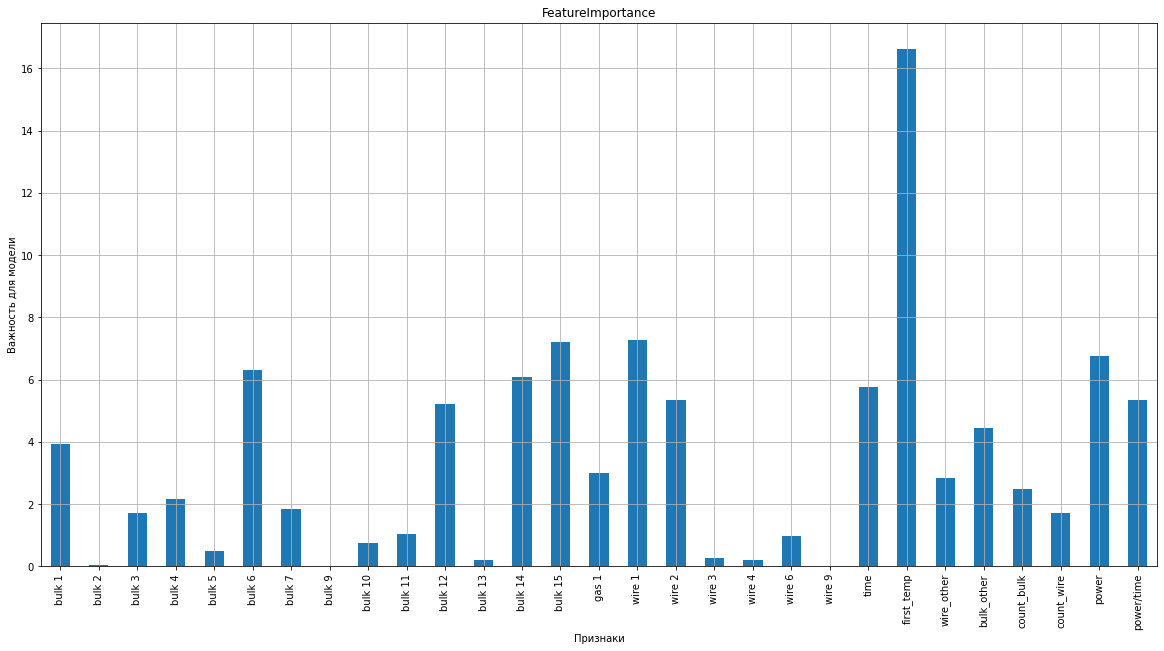

In [161]:
plt.figure(figsize=(20,10))
pd.Series(model.get_feature_importance(), index=features_train.columns).plot.bar()
plt.grid()
plt.xlabel('Признаки')
plt.ylabel('Важность для модели')
plt.title('FeatureImportance')
plt.show()

In [172]:
# Наиболее важные для модели признаки:
FeatureImportance = pd.DataFrame({'Importance': model.get_feature_importance(), 'Feature' : features_train.columns})
FeatureImportance['Importance'] = FeatureImportance['Importance'].astype('int')
FeatureImportance[FeatureImportance['Importance'] > 2]

,Importance,Feature
0,3,bulk 1
5,6,bulk 6
10,5,bulk 12
12,6,bulk 14
13,7,bulk 15
14,3,gas 1
15,7,wire 1
16,5,wire 2
21,5,time
22,16,first_temp


# Проверка на адекватность:

In [173]:
%%time
model = DummyRegressor()
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
test_mae_dummy = mean_absolute_error(target_predict, target_test)
print('MAE_dummy:', test_mae_dummy)

MAE_dummy: 8.00973848677227
Wall time: 1.13 ms


Модель прошла проверку на адекватность, результаты лучше, чем у константной модели

# Вывод:

В данном проекте была проделана работа по исследованию и предобработке данных, в ходе предобработки данных были удалены записи с многочисленными пропусками в показании температуры, далее из первоначальных данных были получены необходимые признаки, такие как `first_temp`, `last_temp`, суммы мощностей для нагрева каждой партии, далее обединили таблицы по значениям key, после этого поменяли в необходимых столбцах типы данных. Было добавлено много новых признаков но далеко не все из них благоприятно повлияли на обучение модели, были оставлены такие признаки как `power(общая мощность)`. С помощью тепловой карты была произведена оценка корреляции между признаками, мультиколлинеарные признаки были удалены. После разделения выборки на обучающую и тестовую были удалены аномалии из обучающей выборки методом ближайщих соседей. Поиск оптимальных гиперпараметров для каждой модели осуществлялся с помощью `OptunaSearchCV`, по итогам была сформирована таблица с результатами на обучающей выборке, лучшей моделью на кросс-валидации оказалась `CatBoostRegressor`, на тестовой выборке модель получила резуьтат по метрике MAE равный `6.79`, что удовлетворяет условию задачи.

<font color='blue'><b>Комментарий тимлида</b>
<br> Проблема может быть в том, что некорректно удалена температура, удалены аномалии по KNN и удалено много признаков.</font>

<font color='blue'><b>Комментарий тимлида</b></font><br><strike>
<font color='crimson'> ❌ Нет итогового вывода</font>
<br><font color='crimson'> ❌ Показать значимаость признаков тестируемой модели

<font color='blue'><b>Комментарий тимлида v2</b></font><br>
<font color='crimson'> ❌ На тесте нет порверки на адекватность с константной моделью, например с помощью Dummy модели https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

<font color='blue'><b>Итоговый комментарий тимлида по коду:</b></font>  
<br><font color='green'> ✔️ Данные объеденены
<br> ✔️ Модели обучены и проверены
</font>

---
<br><font color='blue'>Что нужно исправить:</font><strike>
<br><font color='crimson'> ❌ Правильно обработать первую и последнюю температуру
<br><font color='crimson'> ❌ Удалать аномалии и выбросы только в обучающей выборке
<br><font color='crimson'> ❌ Тестировать одну модель
<br><font color='crimson'> ❌ Добавить итоговый вывод
<br><font color='crimson'> ❌ Показать значимаость признаков тестируемой модели
</font>

<font color='blue'><b>Итоговый комментарий тимлида по коду V2:</b></font>  
<br><font color='green'> ✔️ Большая часть замечаний учтена.
</font>

---
<br><font color='blue'>Что нужно исправить:</font><strike>
<br><font color='crimson'> ❌ Правильно объединить датафреймы
<br><font color='crimson'> ❌ Удалать аномалии по температуре
<br><font color='crimson'> ❌ Добавить проверку на адекватность
</font>

<font color='blue'><b>Итоговый комментарий тимлида по коду V3:</b></font>  
<br><font color='green'> ✔️ Большая часть замечаний учтена.
</font>

---
<br><font color='blue'>Что нужно исправить:</font><strike>
<br><font color='crimson'> ❌ Убрать призрак, в котором соделжиться таргет
</font>

<font color='blue'><b>Итоговый комментарий тимлида по коду V4:</b></font>  
<br><font color='green'> ✔️ Все замечания учтены
</font>

---
<br><font color='blue'>Спасибо за твои старания. Увидимся на отчете. Обрати внимание на вопросы из тренажера

<font color='blue' size=5><b>Комментарий тимлида по отчету</b></font>

<font color='blue'>Мы в конце пути. Осталость только посмотреть отчет!Давай пройдемся по вопросам:</font>
- Какие пункты плана были выполнены, а какие — нет. Почему?
- Какие трудности возникли и как вы их преодолели?
- Какие ключевые шаги в решении задачи вы выделили?
- Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?
- Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

<font color='blue' size=5><b>Комментарий тимлида по отчету V2</b></font>

<font color='blue'> Отчет стал лучше и полнее!

# Отсчтёт по решению:

Таким образом, все пункты плана действий были успешно выполнены, наибольшие сложности возникли с достижением необходимого качества модели, для решения этой сложности особое внимание было уделено качественному подбору гиперпараметров для моделей и генерации признаков для обучения, не все признаки давали хороший результат, путём отбора были получены лучшие признаки и гиперпараметры.

# Трудности:
В ходе выполнения проекта наибольшие трудности возникли на этапе подбора гиперпарметров.

# Ключевые шаги в решении задачи:
<br>-`Анализ имеющихся данных`
<br>-`Предобработка данных`
<br>-`Генерация признаков для обучения`
<br>-`Подбор гиперпараметров для моделей`
<br>-`Выбор наилучшей модели по результатам кросс-валидации`
<br>-`Тестирование модели`
<br>-`Выводы`

Для обучения модели было решено сохранить большую часть призенаков, были удалены только признаки, в которых было очень мало не нулевых значений, такие как wire 5, bulk 8 и wire 7, а также мультиколлинеарные, wire 8. Был добавлен признак `power(общая мощность)`, а так же `power/time`. Все признаки были предобработаны, из времени конца нагрева дугой и временем измерения были получены признаки first_time и last_time, а из них был получени признак time, отражающий кол-во времени в секундах, в течении которого происходил нагрев. Все признаки были приведены к нужным типам данных. В данных встретились аномалии в виде большого отрицательного значения реактивной мощности, а также аномально низкие значения начальной температуры, все перечисленные аномалии были удалены из данных.
Таким образом в обучении использовались такие признаки как bulk 1, bulk 6, bulk 12, bulk 14, bulk 15, gas 1, wire 1, wire 2, time, first_temp, bulk_other, power, power/time.

По итогу лучший результат на кросс-валидации получила модель CatBoostRegressor, для неё был осуществлён подбор гиперпараметров с помощью модуля optuna, отобранные значения гиперпараметров хранятся в переменной best_params_catboost и составляют 
{'eval_metric': 'MAE', 'n_estimators': 738, 'subsample': 0.4, 'learning_rate': 0.014, 'l2_leaf_reg': 5.916862054608292e-06}. На тестовой выборке модель показала качество по mae в 6.79, что удовлетворяет заданию.

Наиболее важным признаком для модели оказалась начальная температура first_temp.

<font color='blue'><b>Комментарий тимлида</b></font>
<br><font color='green'> ✔️ Подробный разбор план</font>

---
<strike>
<br><font color='crimson'> ❌ Какие гиперпараметры лучшие у модели?</font>
<br><font color='crimson'> ❌ Не понятно, какие трудности были по ходу проекта.</font>
<br><font color='crimson'> ❌ Не понятно, что были за признаки модели, как они были обработны</font></strike>

<font color='blue'>Отчет обычно выглядит так, чтобы его могли изучить как люди с опытом в ML, так и менеджеры заказчка. И в целом показыват твою работу от и до, не смотря на твой код. Какие сложности, особые моменты или аномалии есть в данных. Было бы не плохо добавить пункт о значимости факторов/коэффициентах факторов, чтобы заказчик сравнил со своими экспериментальными данными, какой фактор больше всего влияет на предсказание. 
<br>




<font color='blue' size=5><b>Итоговый комментарий тимлида по проекту V2</b></font>

---
<font color='blue'> Марк, было приятно смотреть твою работу, следить, как менялся твой код и становился проект лучше. 

<br> Что хочется отметить:
<br>    1. Логика повествования и объяснение результатов.

<br> Считаю, что можно улучшить навыки в:
<br>    1. Создании конвеера(pipeline) для моделей. Очень часто нужно сделать коробочное решение для предсказания, которое можно завернуть в pipeline модель с последующей конвертацией в pickle файл.
<br>    2. Подбор гиперпараметров при кросс-валидации. При работе с моделями важно знать много парамтеров, так как можно сделать модель под конкретную задачу и знать, что ее можно не переобучить для оптимальной работы.
<br>    3. Оформление графиков для объяснения результатов. Визуальное представление проще распознается не-пограммистами. Правильные масштабы, названия и подписи показывают профессионализм аналитика.
<br>    4. Создании функций для однотипных задач. Часто повторяющийся код можно обернуть в функцию, чтобы визуально было удобно работать с тетрадкой.
  
<br> До новых встреч на поле Data Science и возможно в ODS. Твоя работа показательная, я бы хотел чтобы ты выступил с ней на заключительном вебинаре. Удачи!
</font>